In [1]:
#sklearn Imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,roc_auc_score,accuracy_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data Frame and Missing Values
df = pd.read_csv('dataset.csv')

deu = df[(df.iso == 'DEU') | (df.iso == 'GBR')| (df.iso == 'AUT')| (df.iso == 'BEL')| (df.iso == 'ITA') | (df.iso == 'DNK')| 
         (df.iso == 'PRT')| (df.iso == 'CHE')| (df.iso == 'SWE') | (df.iso == 'FRA') | (df.iso == 'ESP') | (df.iso == 'NLD')
        | (df.iso == 'IRL')| (df.iso == 'NOR')| (df.iso == 'GRC')| (df.iso == 'FIN')]


new_data=deu.fillna(deu.mean())

In [3]:
#Predictors and Target Value
x = new_data[[ 'govvote', 'oppvote', 'partycount', 'right', 'left', 'extr',
              'gdppeak', 'frac', 'cpi', 'turnover', 'vetopl', 'dict']]
y = new_data.pk_fin

In [4]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=100)

In [5]:
#Algorithms
ML = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),
    #GLM
    linear_model.LogisticRegressionCV(),
    #Navies Bayes
    naive_bayes.GaussianNB(), 
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #SVM
    svm.SVC(probability=True),
    #Trees    
    tree.DecisionTreeClassifier(),
    ]

,Algorithm Name,Train Accuracy,Test Accuracy,Precission,Recall,AUC
1,LogisticRegressionCV,0.9644,0.9793,0.000000,0.000000,0.495599
3,KNeighborsClassifier,0.9644,0.9793,0.000000,0.000000,0.586854
4,SVC,0.9747,0.9793,0.000000,0.000000,0.634830
0,RandomForestClassifier,0.9937,0.9707,0.142857,0.083333,0.865977
2,GaussianNB,0.9552,0.9638,0.000000,0.000000,0.817928
5,DecisionTreeClassifier,0.9989,0.9552,0.062500,0.083333,0.527656


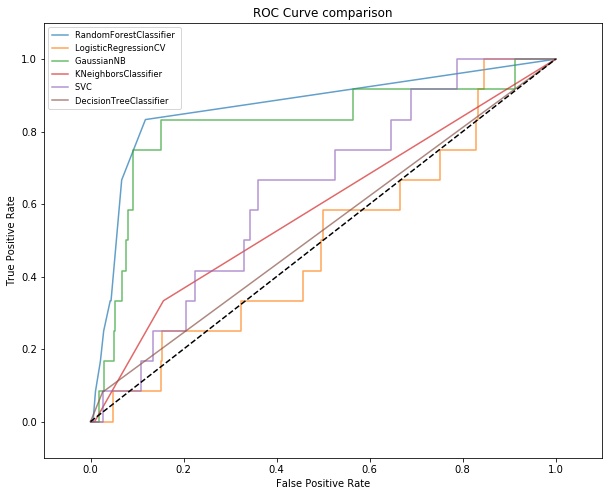

In [6]:
#Algorithm Evaluation
Columns = []
Compare = pd.DataFrame(columns = Columns)

plt.figure(figsize=(10,8))
row_index = 0
for alg in ML:
    pred = alg.fit(x_train, y_train)
    predicted= pred.predict(x_test)
    fp, tp, th = roc_curve(y_test, pred.predict_proba(x_test)[:,1])
    ML_name = alg.__class__.__name__
    Compare.loc[row_index,'Algorithm Name'] = ML_name
    Compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    Compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    Compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    Compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    Compare.loc[row_index, 'AUC'] = auc(fp, tp)
    
    plt.plot(fp,tp,alpha=0.7, label='%s ' % (ML_name))
    row_index+=1
  
plt.title('ROC Curve comparison')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')


Compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
Compare

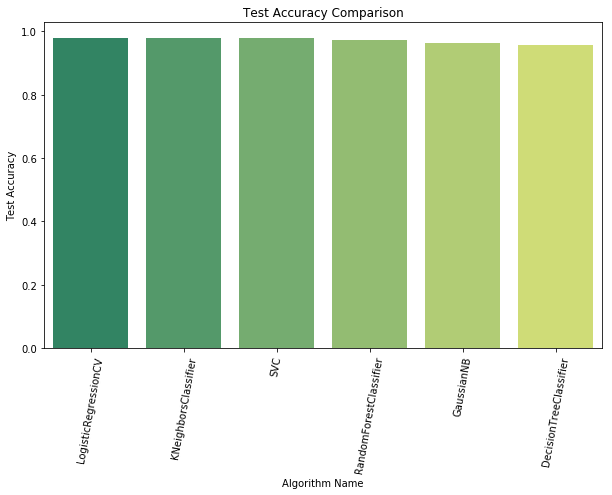

In [7]:
#Bar Plot of Algorithms
plt.subplots(figsize=(10,6))
sns.barplot(x="Algorithm Name", y="Test Accuracy",data=Compare,palette='summer')
plt.xticks(rotation=80)
plt.title('Test Accuracy Comparison')
plt.show()

In [16]:
T_test = []
T_test.clear()

# Logistic Regression Parameter Tuning

In [14]:
#Before Parameter Tuning
tunealg = linear_model.LogisticRegressionCV() 
tunealg.fit(x_train, y_train)

print('Parameters: ', tunealg.get_params())
print("Training score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tunealg.score(x_test, y_test)))

Parameters:  {'Cs': 10, 'class_weight': None, 'cv': 'warn', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Training score: 0.96
Test score: 0.98


In [22]:
#After Parameter Tuning
param_grid = {  'solver': ['newton-cg', 'lbfgs','liblinear', 'sag'],
              'random_state' : [80],'penalty':['l2']
             }

tune_model = model_selection.GridSearchCV(linear_model.LogisticRegressionCV(), 
                param_grid=param_grid, cv=12,scoring = 'roc_auc')
tune_model.fit (x_train, y_train)

print('Parameters: ', tune_model.best_params_)
print("Training score: {:.2f}". format(tune_model.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tune_model.score(x_test, y_test)))

T_test.append(tune_model.score(x_test, y_test))

Parameters:  {'penalty': 'l2', 'random_state': 80, 'solver': 'lbfgs'}
Training score: 0.56
Test score: 0.50


# Decision Tree Parameter Tuning

In [17]:
#Before Tuning
tunealg = tree.DecisionTreeClassifier() 
tunealg.fit(x_train, y_train)

print('Parameters: ', tunealg.get_params())
print("Training score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tunealg.score(x_test, y_test)))


Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
Training score: 1.00
Test score: 0.96


In [18]:
#After Tuning
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
               }

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), 
                    param_grid=param_grid, cv=10, scoring = 'roc_auc')
tune_model.fit (x_train, y_train)


print('Parameters: ', tune_model.best_params_)
print(" Training score: {:.2f}". format(tune_model.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tune_model.score(x_test, y_test)))

T_test.append(tune_model.score(x_test, y_test))

Parameters:  {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
 Training score: 0.95
Test score: 0.95


<BarContainer object of 2 artists>

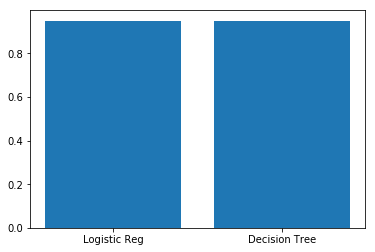

In [19]:
#Bar Plot
x=['Logistic Reg','Decision Tree']
y = T_test
plt.bar(x,y,label='Algos')

In [20]:
#Prediction
check = new_data[(new_data['year'] == 2000)]
check[[ 'govvote', 'oppvote', 'partycount', 'right', 'left', 'extr',
              'gdppeak', 'frac', 'cpi', 'turnover', 'vetopl', 'dict','pk_fin']]

,govvote,oppvote,partycount,right,left,extr,gdppeak,frac,cpi,turnover,vetopl,dict,pk_fin
275,60.099998,39.900002,4.0,26.900000,0.000000,26.900000,0,0.706500,82.586655,1.0,3.069999,0,0
420,58.439999,36.849998,11.0,11.400000,0.000000,11.400000,0,0.889511,17380.000000,0.0,11.050000,0,0
710,80.800003,16.000000,14.0,26.100000,0.900000,27.000000,0,0.806650,121.222702,1.0,7.300000,0,0
855,47.599998,46.400002,5.0,4.400000,5.100000,9.500000,0,0.697089,122.545097,0.0,1.260417,0,0
1000,39.799999,59.799999,11.0,7.400000,10.300000,17.700001,0,0.796729,123.592300,0.0,1.769231,0,0
1145,44.599998,50.599998,11.0,0.000000,5.500000,5.500000,0,0.596065,146.092102,0.0,0.000000,0,0
1290,67.199997,29.100000,8.0,1.000000,11.700000,12.700000,0,0.805850,120.245270,1.0,11.121212,0,0
1435,42.099998,51.099998,8.0,15.000000,12.400000,27.400000,0,0.717486,119.162102,0.0,4.682000,0,0
1580,43.200001,52.240002,11.0,0.700000,1.400000,2.100000,0,0.527787,93.048370,0.0,0.000000,0,0
1725,43.799999,56.200001,4.0,0.000000,8.720000,8.720000,0,0.547300,72.201294,0.0,2.994494,0,0


In [21]:
#Output
tune_model.predict([[36.3,60.9,7,0.4,12,12.4,0,0.7,129.7,0,0,0]])

array([0], dtype=int64)

In [8]:
List_S = ['a','b','c']
pare = pd.DataFrame(columns = List_S)

ValueError: Could not interpret input 'Algorithm Name'

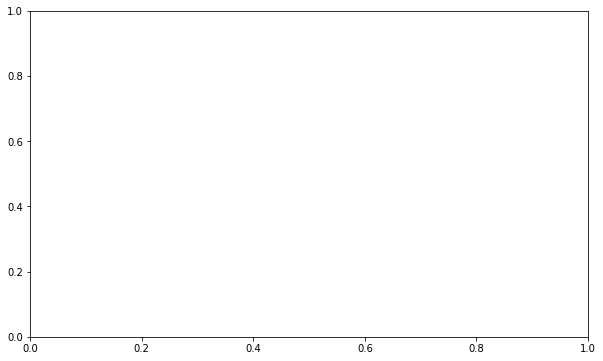

In [9]:
#Bar Plot of Algorithms
plt.subplots(figsize=(10,6))
sns.barplot(x="Algorithm Name", y="Test Accuracy",data=pare,palette='summer')
plt.xticks(rotation=80)
plt.title('Test Accuracy Comparison')
plt.show()